In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

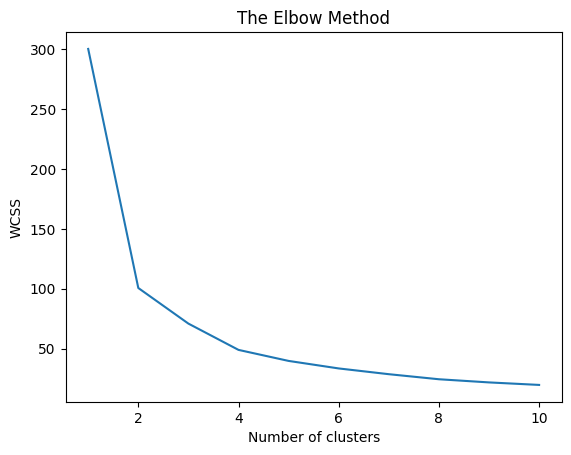

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


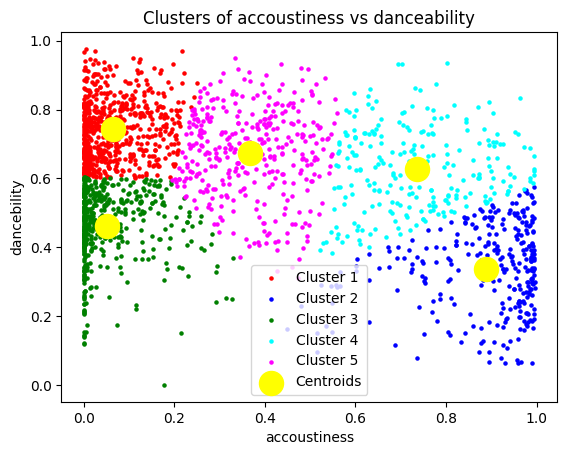

In [12]:
X = dataset.iloc[:, [3,4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accoustiness vs danceability')
plt.xlabel('accoustiness')
plt.ylabel('dancebility')
plt.legend()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)
musicdata = dataset.pivot_table(index = 'artist_name',columns = 'track_name',values='popularity')
dataset.sort_values('popularity',ascending=False).head(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
15849,Mc Davi,1R1HmdunvOnEK4bibKp7q5,"Bonita, Lindinha e Sagaz",0.3060,0.712,155077,0.465,0.000000,1,0.0783,-7.143,1.0,0.4620,129.980,4.0,0.829,71.0
51357,Ferrugem,3eWHUE5D5R19q7BvOX7NSJ,Sinto sua falta - Ao vivo,0.7460,0.548,204681,0.643,0.000000,9,0.9610,-6.570,1.0,0.0416,143.929,4.0,0.668,71.0
61804,Ultimo,3f2b204xj4jZdoHjo9wj0W,Poesia senza veli,0.7520,0.739,218167,0.519,0.000000,8,0.2220,-7.461,0.0,0.1250,81.991,4.0,0.255,71.0
25511,Damas Gratis,3trowLiYwwOoiwapLISNyk,No Te Creas Tan Importante - En Vivo,0.2020,0.302,239760,0.758,0.000000,5,0.8810,-5.273,1.0,0.0424,174.704,4.0,0.669,70.0
1183,Céline Dion,7FihoA0WgTT21DkWR7wbYR,Ashes - from Deadpool 2,0.4590,0.342,199507,0.425,0.000000,0,0.1220,-9.064,0.0,0.0425,110.620,4.0,0.115,70.0
10283,Therapie TAXI,3yndKI4zWEyC36BQYrdKBA,Hit Sale (feat. Roméo Elvis),0.1410,0.573,184400,0.784,0.000000,9,0.0844,-5.224,1.0,0.0591,82.009,4.0,0.690,69.0
42953,Dilsinho,7B826fTyDa3DkjnKpOgXFo,12 Horas,0.8310,0.578,240048,0.580,0.000000,2,0.1010,-6.695,1.0,0.0414,141.925,4.0,0.348,69.0
28396,Ferrugem,5KNi9XFap48ry4puG7rvqv,Pra você acreditar - Ao vivo,0.6580,0.486,203895,0.734,0.000000,1,0.9650,-6.356,0.0,0.0423,145.842,4.0,0.639,69.0
12290,Sun Diego,7kYC5ilFc6kXN6YagFRemB,Eloah,0.0476,0.781,214000,0.754,0.000007,1,0.1860,-4.074,0.0,0.0754,110.012,4.0,0.421,68.0
11962,Ninho,7BtAkqRFQjvOYOq5k5mlCb,Fendi,0.1490,0.456,210253,0.697,0.000000,6,0.1640,-7.132,0.0,0.4900,70.090,4.0,0.344,67.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)
musicdata = dataset.pivot_table(index = 'artist_name',columns = 'track_name',values='popularity')
dataset.sort_values('popularity',ascending=False).head(10)
dataset.sort_values('popularity',ascending=False).iloc[:,-1]
JonasBrothers_music_popularity=dataset.loc[dataset['track_name'] =='Bubalu' ]
Ozuna_music_popularity=dataset.loc[dataset['track_name'] =='Baila Baila Baila' ]
JonasBrothers_music_popularity
Ozuna_music_popularity

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity


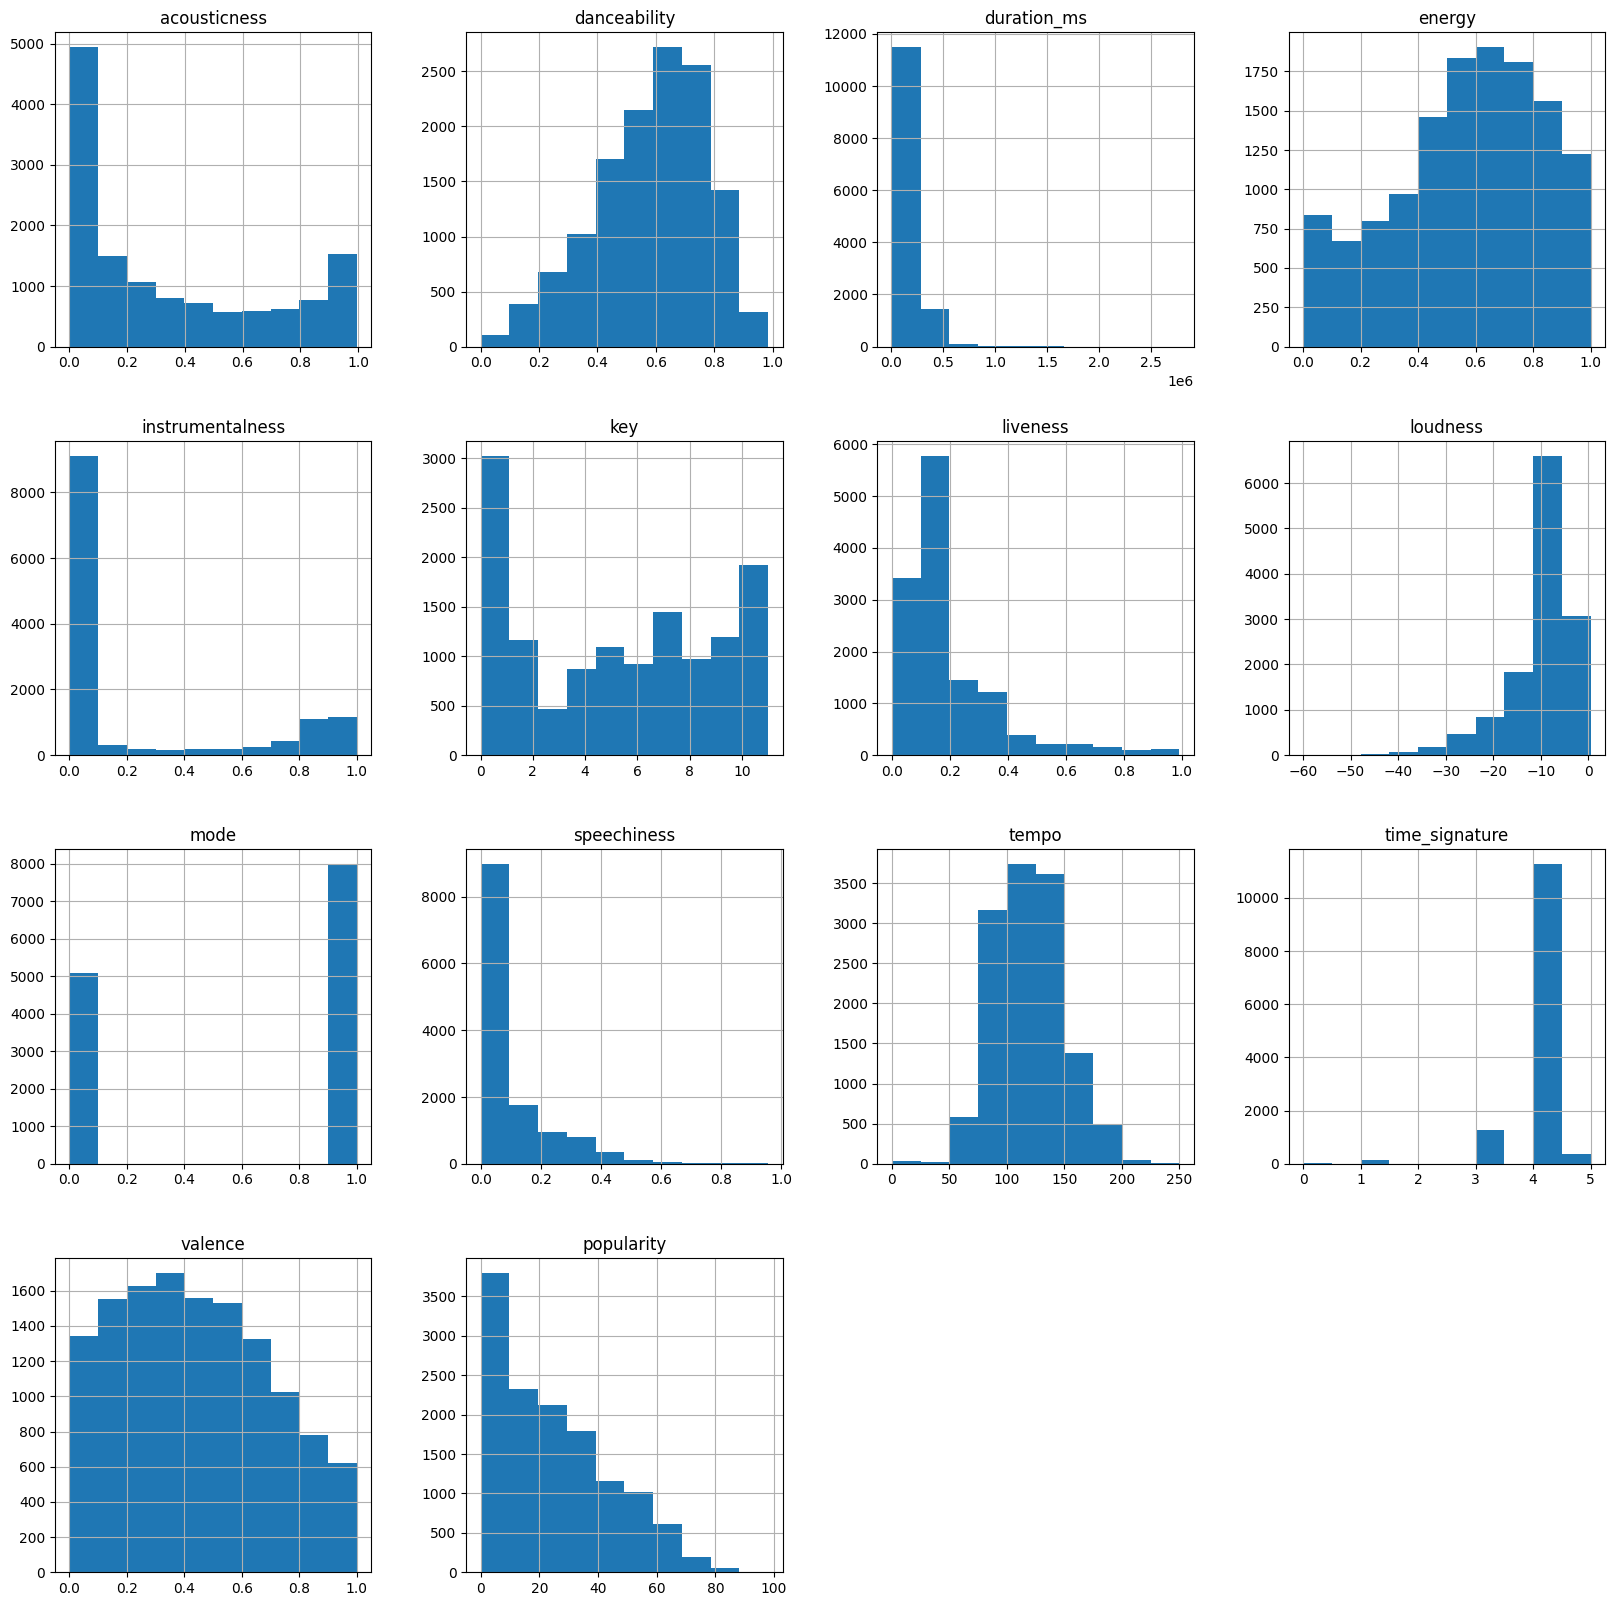

In [17]:
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)
dataset.hist(figsize = (20, 20))
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

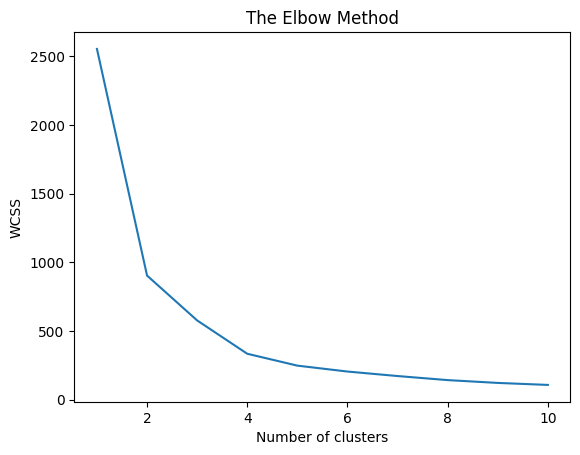

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


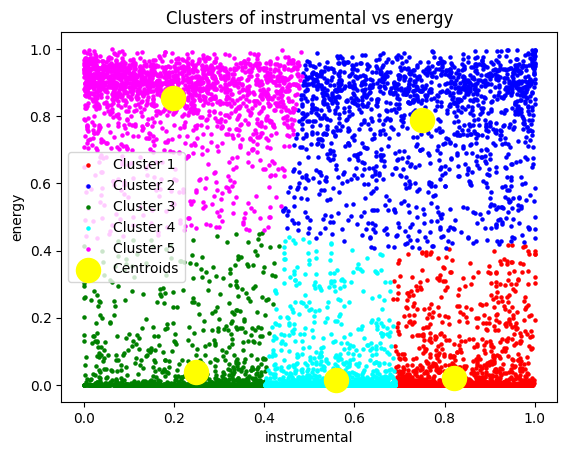

In [19]:
X = dataset.iloc[:, [6,7]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of instrumental vs energy')
plt.xlabel('instrumental')
plt.ylabel('energy')
plt.legend()
plt.show()

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')
(13066, 17)
       acousticness  danceability   duration_ms        energy  \
count  13066.000000  13066.000000  1.306600e+04  13066.000000   
mean       0.342462      0.582968  2.113831e+05      0.568530   
std        0.343708      0.188550  1.062162e+05      0.257989   
min        0.000000      0.000000  9.787000e+03      0.000000   
25%        0.031600      0.460250  1.634850e+05      0.399000   
50%        0.208000      0.610000  2.018600e+05      0.598000   
75%        0.636750      0.726000  2.407275e+05      0.772000   
max        0.996000      0.985000  2.770500e+06      1.000000   

       instrumentalness           key      liveness      loudness  \
count      13066.000000  13066.000000  13066.000000  13066

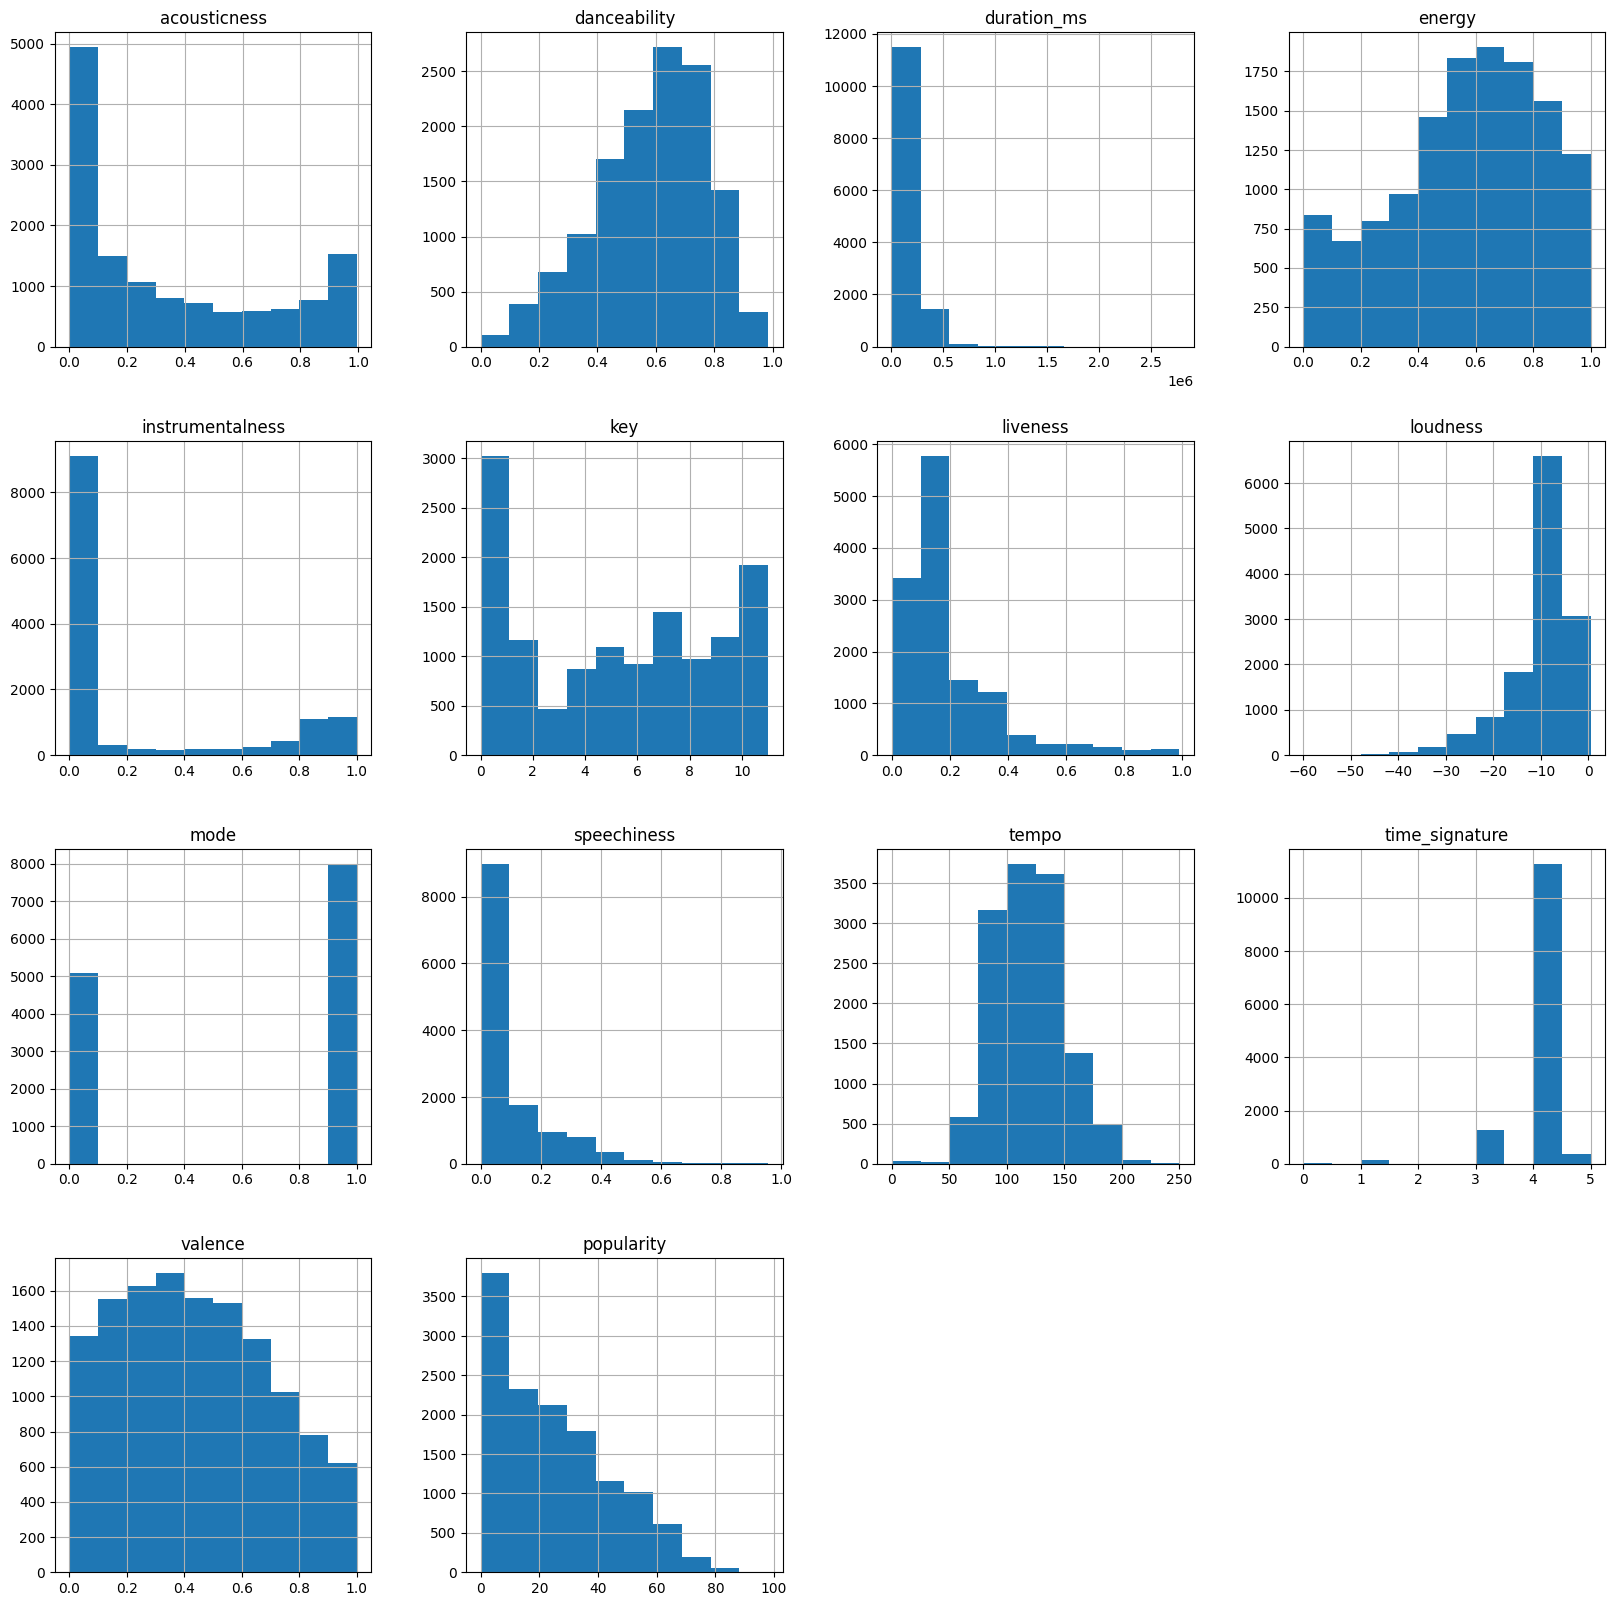

In [21]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Importing the dataset
#dataset = pd.read_csv(r'C:\Users\Ravi\Desktop\Music Recommendation System\music.csv')

dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')

# y = dataset.iloc[:, 3].values

# dataset exploring
print(dataset.columns)

# Print the shape of the data
dataset = dataset.sample(frac=0.1, random_state = 1)
print(dataset.shape)
print(dataset.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

# Plot histograms of each parameter
dataset.hist(figsize = (20, 20))
plt.show()
#plt.savefig('p1.png')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

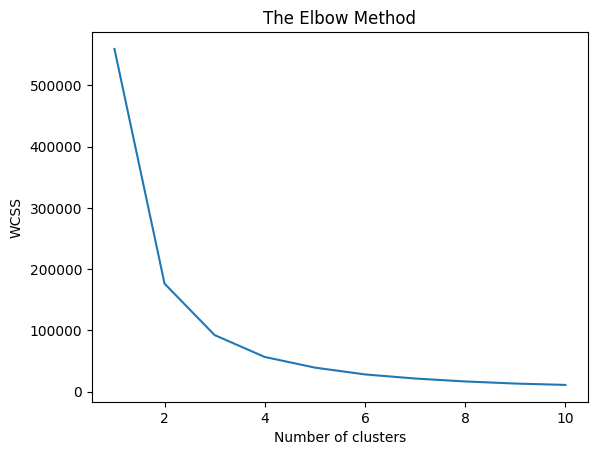

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


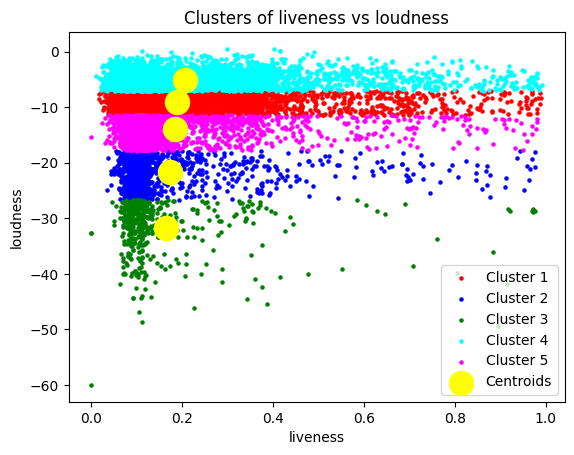

In [24]:
X = dataset.iloc[:, [9,10]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of liveness vs loudness')
plt.xlabel('liveness')
plt.ylabel('loudness')
plt.legend()
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)
musicdata = dataset.pivot_table(index = 'artist_name',columns = 'track_name',values='popularity')
dataset.sort_values('popularity',ascending=False).head(10)
dataset.sort_values('popularity',ascending=False).iloc[:,-1]

99366     98
101609    95
123911    91
99377     91
123943    90
          ..
13663      0
26724      0
30718      0
84674      0
81454      0
Name: popularity, Length: 13066, dtype: int64

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)
musicdata = dataset.pivot_table(index = 'artist_name',columns = 'track_name',values='popularity')
musicdata

track_name,"""42"" - From SR3MM","""Petit Quatuor"" en Ut Majeur, CG 561: I. Adagio - Allegro moderato","""Try It""",#NoBS,#NoJumper,#OneTake,#SayItTwice,#WCF,#WYD - JP Ver.,#freesam,...,사랑했다고 That You Loved Me,아픈 길 hurt road,안아줄게 Hug,열기 (9),외투,우리 Us,우연처럼 Coincidence,텐데…Timeless,항상 (HANGSANG),후유증 Falling Blossoms
artist_name,,,,,,,,,,,,,,,,,,,,,
!!!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Elena Of Avalor"" Cast",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Weird Al"" Yankovic",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$hirak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$tranger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
유닛플러스,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
임정희,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
장재인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)
musicdata = dataset.pivot_table(index = 'artist_name',columns = 'track_name',values='popularity')
dataset.sort_values('popularity',ascending=False).head(10)
dataset.sort_values('popularity',ascending=False).iloc[:,-1]
JonasBrothers_music_popularity=dataset.loc[dataset['track_name'] =='Bubalu' ]
Ozuna_music_popularity=dataset.loc[dataset['track_name'] =='Baila Baila Baila' ]
p=JonasBrothers_music_popularity['popularity']
pp=int(p)
sim_Sucker=dataset.loc[dataset['popularity'] ==pp]
print(sim_Sucker)

          artist_name                track_id  \
124112  Calvin Harris  7ef4DlsgrMEH11cDZd32M6   
124113        Becky G  7dNwJbsT0sg1le5kVugGJb   
99396          Khalid  09oZ9eXQ2fo6YDrPzJqAoP   

                             track_name  acousticness  danceability  \
124112         One Kiss (with Dua Lipa)        0.0370         0.791   
124113                           Bubalu        0.6160         0.800   
99396   Outta My Head (with John Mayer)        0.0174         0.729   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
124112       214847   0.862          0.000022    9    0.0814    -3.240     0   
124113       228493   0.355          0.000000    6    0.1180   -10.470     0   
99396        177067   0.545          0.000274    0    0.3690    -7.818     1   

        speechiness    tempo  time_signature  valence  popularity  
124112       0.1100  123.994               4    0.592          88  
124113       0.0895  145.929               4    0.253        

In [31]:
import pandas as pd

In [33]:
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')

In [34]:
dataset

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/SpotifyAudioFeaturesApril2019.csv')
dataset = dataset.sample(frac=0.1, random_state = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

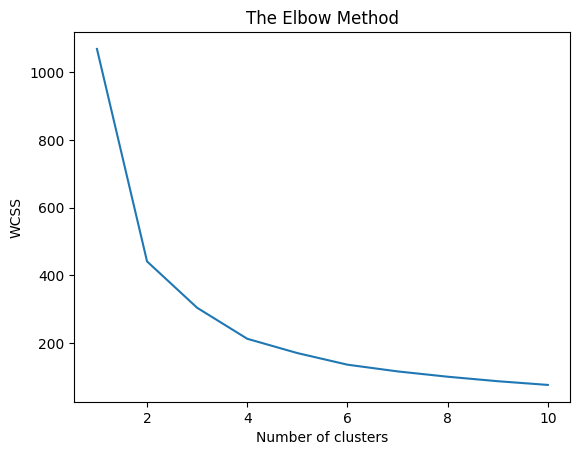

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


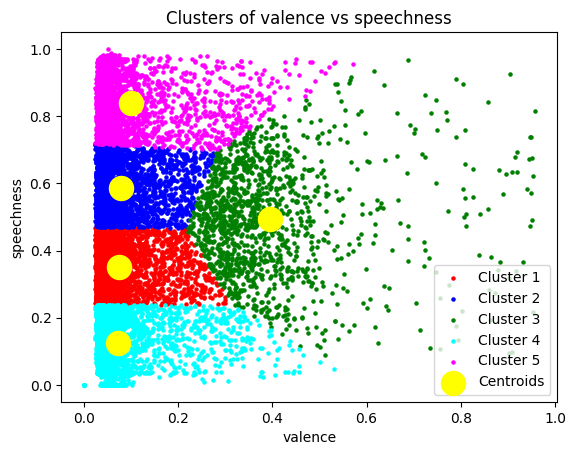

In [36]:
X = dataset.iloc[:, [12,15]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of valence vs speechness')
plt.xlabel('valence')
plt.ylabel('speechness')
plt.legend()
plt.show()